# Regression(회귀)

`02_Regression.ipynb`

## K-Nearest Neighbors 회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

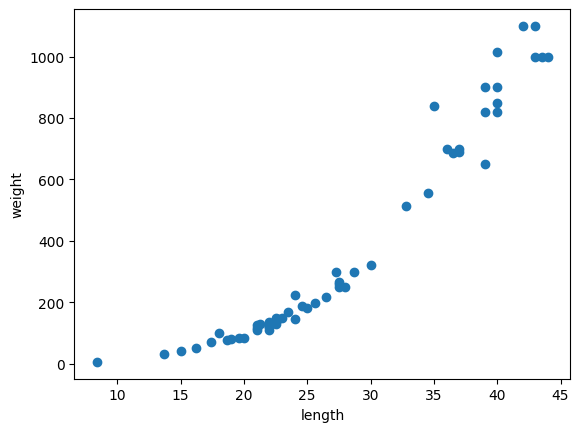

In [6]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')


plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
# 현재 X_train이 array임. Vector -> Matrix해야됨

X_train = X_train.reshape(-1, 1) # -1은 알아서 채우라는 뜻.
X_test = X_test.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(X_train, y_train)

knr.score(X_test, y_test)
# 백점(1.0)이 나오지 않는 이유 -> 예측은 당연히 100프로가 나올 수 없다.

0.992809406101064

In [19]:
from sklearn.metrics import mean_absolute_error
# 절댓값 오차를 말해주는 함수

test_prediction = knr.predict(X_test)
                    # 예측값    # 실제 무게
mean_absolute_error(test_prediction, y_test)
# 예측값이 평균적으로 19g 정도 차이가 남.

19.157142857142862

In [ ]:
knr.score(X_train, y_train)
# 학습데이터에 예측점수가 더 낮네????

0.9698823289099254

is the....
- 과(대)적합 `Overfitting`
    - 훈련 세트 점수 >>> 테스트 세트 점수

- 과소적합 `Underfitting`
    - 테스트 세트 점수 > 훈련 세트 점수
    - or 그냥 점수가 낮음

In [ ]:
print(knr.score(X_train, y_train), knr.score(X_test, y_test))
# is the 과소적합...
# 어떻게 해결할까?

knr.n_neighbors = 3
# 평가할 친구를 줄이자.

print(knr.score(X_train, y_train), knr.score(X_test, y_test))
# 점수가 좋아졌다!

0.9698823289099254 0.992809406101064
0.9804899950518966 0.9746459963987609


[1033.33333333]


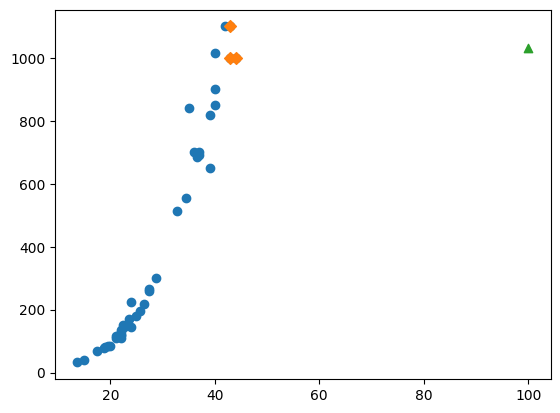

In [ ]:
print(knr.predict([[100]]))

distances, indexes = knr.kneighbors([[100]])

plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
plt.scatter(100, 1033, marker='^')
plt.show()

# 데이터가 훈련데이터를 넘어가면 그 평균값을 산출하게 돼서 별로임.
## 고로 이거를 넘어가는 방식을 취해야 함.

## 선형 회귀

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.coef_, lr.intercept_)
# [39.01714496] -709.0186449535477
# y = 39x - 709

print(lr.score(X_test, y_test))
# 0.8247503123313559
print(lr.score(X_train, y_train))
# 0.9398463339976041

# train > test이긴 하지만, 사실 둘 다 점수가 개낮음.(is the 과소적합)
# 그래서 함수 차수를 올려서 맞춰보는 게 좋지 않나? 하는 생각이 듦.

lr.predict([[50]])


[39.01714496] -709.0186449535477
0.8247503123313559
0.9398463339976041


array([1241.83860323])

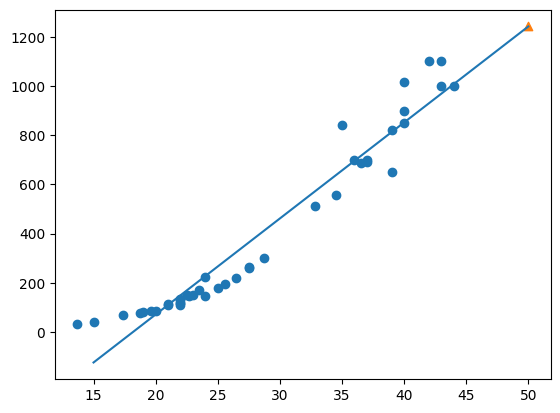

In [35]:
plt.scatter(X_train, y_train)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8,  marker='^')

plt.show()

### 다항 회귀

In [38]:
X_train_poly = np.column_stack((X_train ** 2, X_train))
X_test_poly = np.column_stack((X_test ** 2, X_test))

In [51]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print(lr.coef_, lr.intercept_)
# [  1.01433211 -21.55792498] 116.05021078278247
#   2차항 계수    1차항 계수       y절편

print(lr.score(X_train_poly, y_train))
# 0.9706807451768623
print(lr.score(X_test_poly, y_test))
# 0.9775935108325121

lr.predict([[50**2, 50]])

[  1.01433211 -21.55792498] 116.05021078278247
0.9706807451768623
0.9775935108325121


array([1573.98423528])

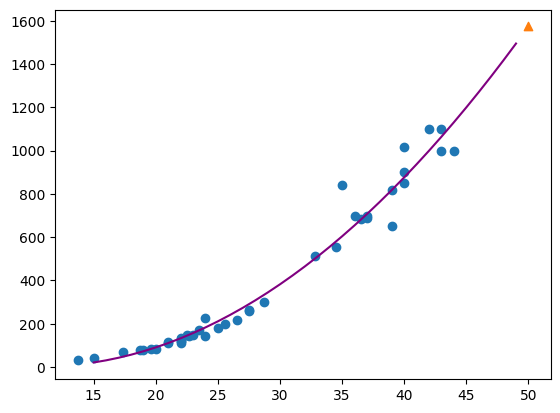

In [49]:
point = np.arange(15, 50)
plt.scatter(X_train, y_train)
# plt.scatter(X_test, y_test) # 어차피 학습데이터만 보는 중~
plt.plot(point, 1.0143321 * point ** 2 -21.55792498 * point + 116.05021078278247, color='purple')
plt.scatter(50, 1573.98423528, marker='^')


plt.show()